In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd
from nltk.corpus import twitter_samples

from utils import process_tweet

In [2]:
# positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [3]:
tweets = positive_tweets + negative_tweets
labels = np.append(np.ones((len(positive_tweets), 1)), np.zeros((len(negative_tweets), 1)), axis=0)

In [7]:
print(labels)
print(labels.shape)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
(10000, 1)


In [8]:
train_pos = positive_tweets[:4000]
train_neg = negative_tweets[:4000]

train_x = train_pos + train_neg

print(len(train_x))

8000


### Loading extracted features

In [10]:
data = pd.read_csv('logistic_features.csv')
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [11]:
X = data[['bias', 'positive', 'negative']].values
y = data['sentiment'].values

In [14]:
print(X.shape)

(8000, 3)


In [15]:
print(y.shape)

(8000,)


### Loading pretrained model

In [16]:
theta = [7e-08, 0.0005239, -0.00055517]

#### Plotting

Text(0, 0.5, 'Negative')

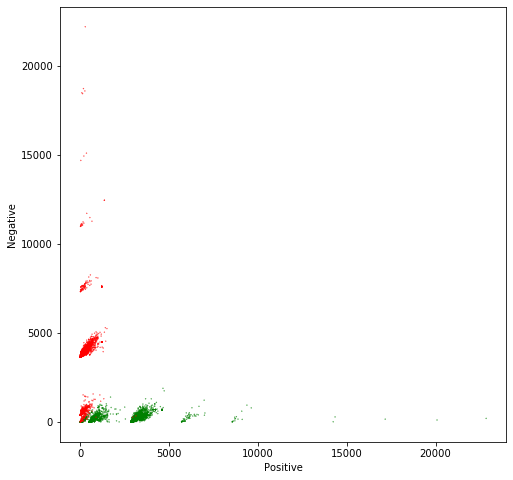

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'green']

ax.scatter(X[:, 1], X[:, 2], c=[colors[int(k)] for k in y], s=0.1)
plt.xlabel('Positive')
plt.ylabel('Negative')